In [1]:
import numpy as np
import pandas as pd

In [4]:
dataset=pd.read_csv('/home/aman/Downloads/iris.csv')
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
dataset.groupby('species').size()

species
0    50
1    50
2    50
dtype: int64

In [6]:
feature_columns=['sepal_length','sepal_width','petal_length','petal_width']
X=dataset[feature_columns].values
Y=dataset['species'].values

In [64]:
from sklearn.cross_validation import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=40)

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
get_ipython().magic(u'matplotlib inline')

In [66]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import cross_val_score

In [67]:
classifier=KNeighborsClassifier(n_neighbors=3)

In [68]:
classifier.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [69]:
Y_pred=classifier.predict(X_test)

In [70]:
cm=confusion_matrix(Y_test,Y_pred)
cm

array([[ 8,  0,  0],
       [ 0, 12,  0],
       [ 0,  0, 10]])

In [71]:
accuracy=accuracy_score(Y_test,Y_pred)*100
print('Accuracy of our model is equal' + str(round(accuracy,2)) + '%.')

Accuracy of our model is equal100.0%.


In [25]:
k_list=list(range(1,50,2))
cv_scores=[]

In [26]:
for k in k_list:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,X_train,Y_train,cv=10,scoring='accuracy')
    cv_scores.append(scores.mean())
                     

<Figure size 432x288 with 0 Axes>

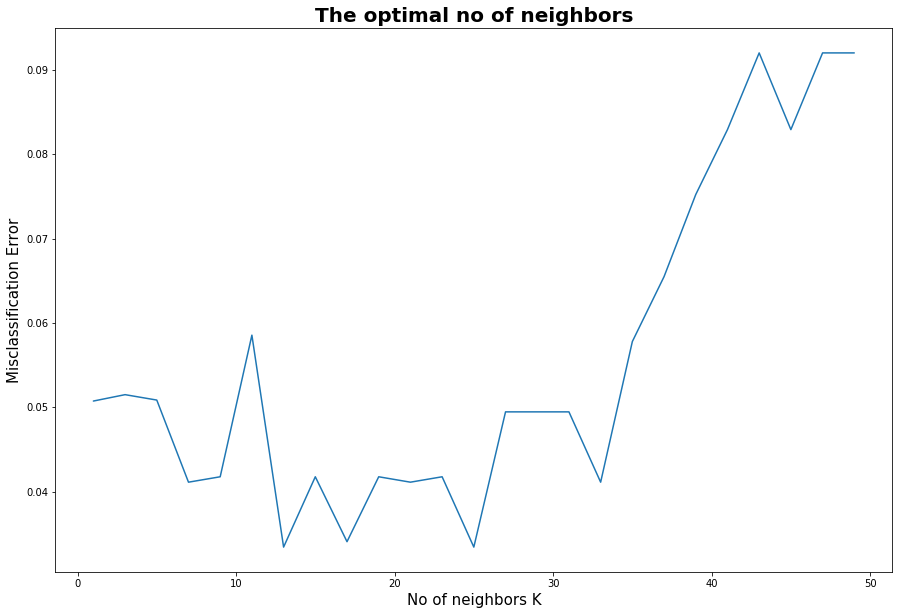

In [27]:
MSE=[1 - x for x in cv_scores]
plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal no of neighbors',fontsize=20,fontweight='bold')
plt.xlabel('No of neighbors K',fontsize=15)
plt.ylabel('Misclassification Error',fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list,MSE)
plt.show()

In [28]:
best_k=k_list[MSE.index(min(MSE))]
print("The optimal no of neighbors is %d."%best_k)

The optimal no of neighbors is 25.


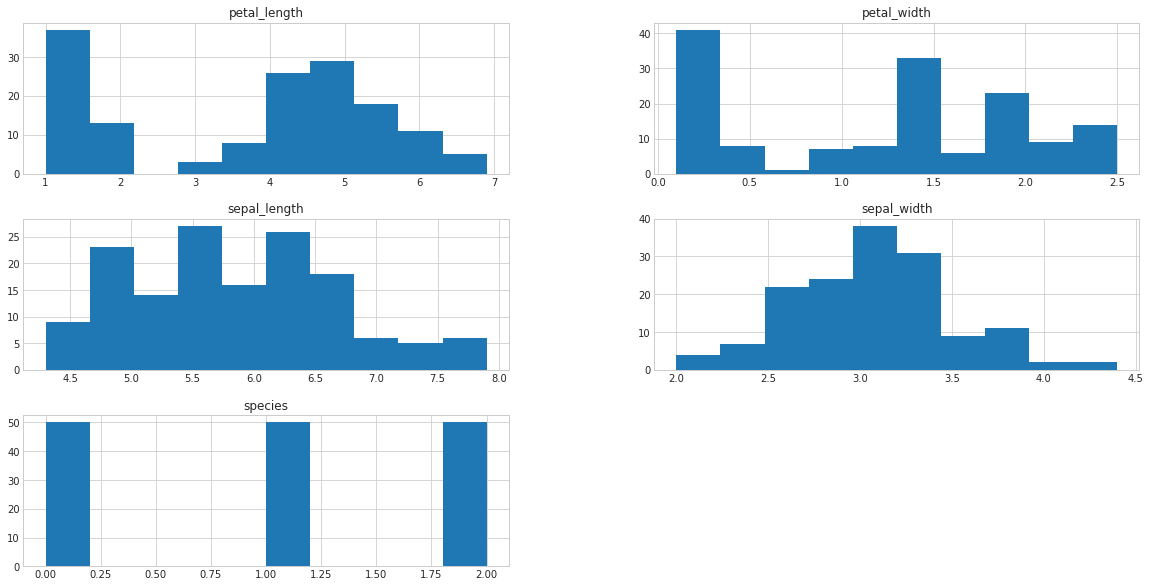

In [38]:
dataset.hist(figsize=(20,10))  #check with different size
plt.show()

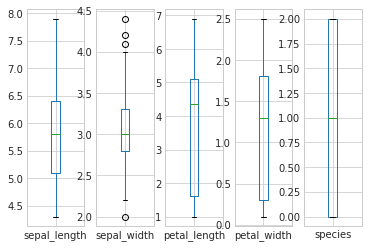

In [36]:
dataset.plot(kind='box',subplots=True,sharex=False,sharey=False)
plt.show()

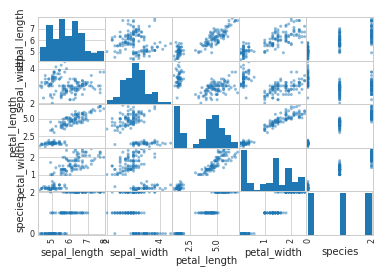

In [43]:
from pandas.plotting import scatter_matrix
scatter_matrix(dataset)
plt.show()

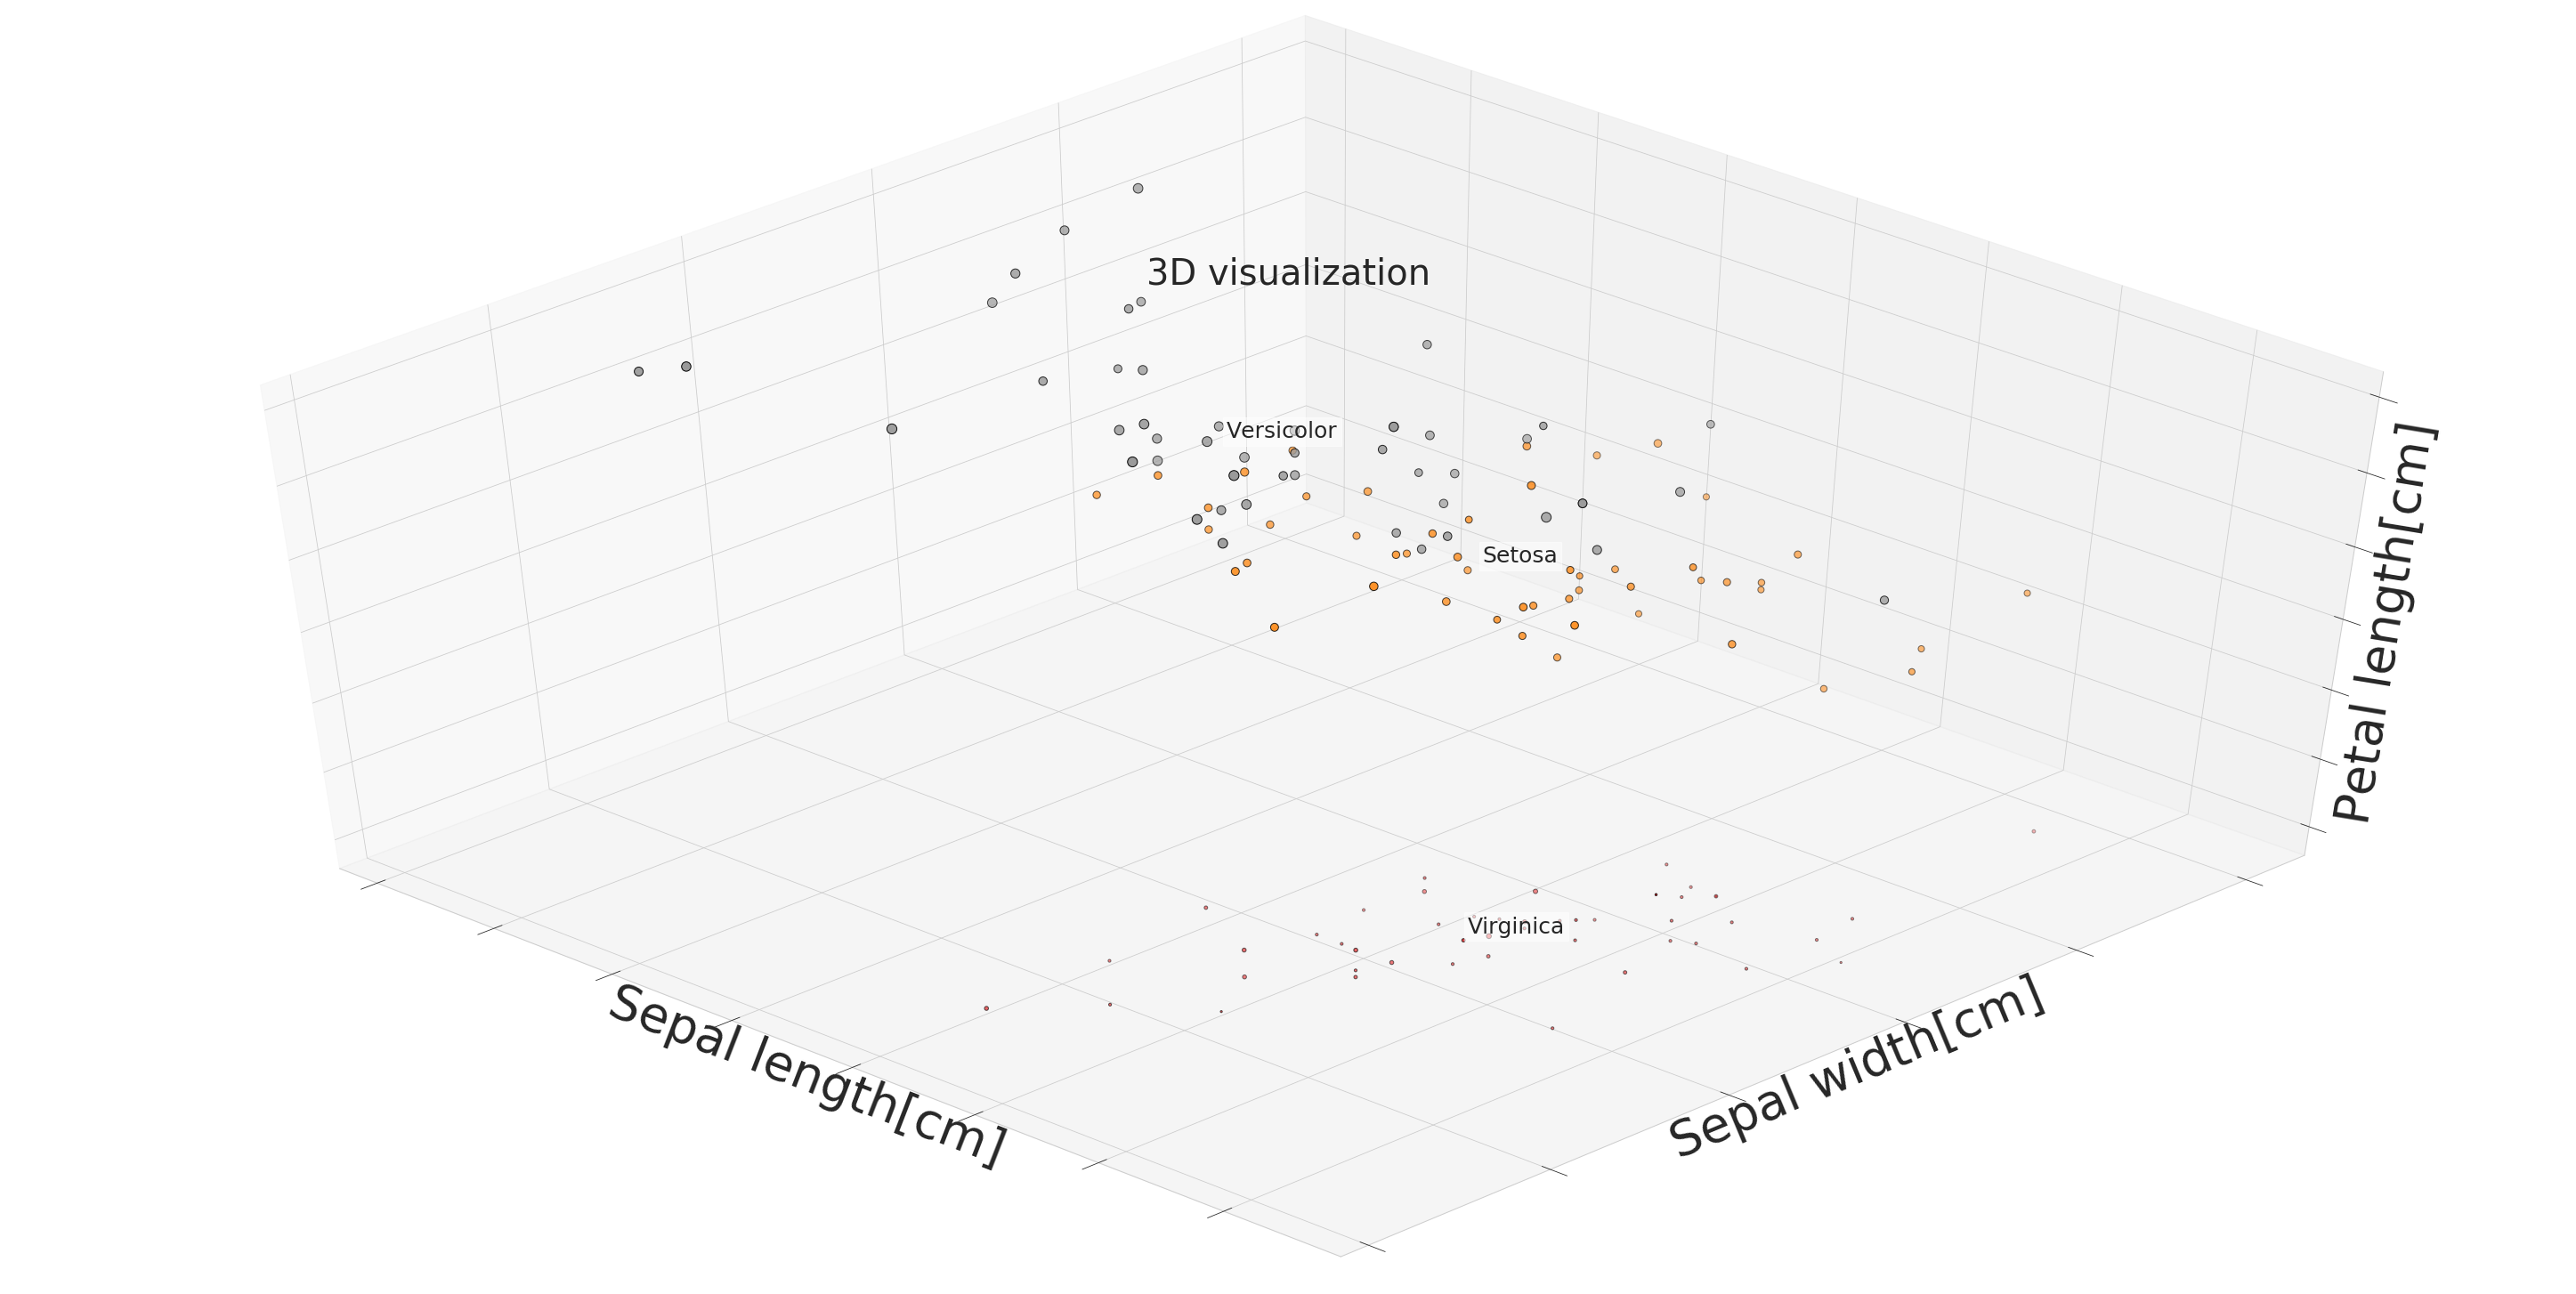

In [47]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(1, figsize=(40,20))
ax=Axes3D(fig, elev=48,azim=134)
ax.scatter(X[: ,0],X[: ,1],X[: ,2],c=Y,cmap=plt.cm.Set1, edgecolor='k',s=X[:, 3]*50)
for name,label in [('Virginica',0),('Setosa',1),('Versicolor',2)]:
    ax.text3D(X[Y==label,0].mean(),X[Y==label,1].mean(),X[Y==label,2].mean(),name,horizontalalignment='center',bbox=dict(alpha=.5,edgecolor='w',facecolor='w'),size=25)
    ax.set_title("3D visualization",fontsize=40)
ax.set_xlabel("Sepal length[cm]",fontsize=55)
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("Sepal width[cm]",fontsize=55)
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("Petal length[cm]",fontsize=55)
ax.w_zaxis.set_ticklabels([])
plt.show()